In [278]:
import pandas as pd
import numpy as np

In [279]:
hh19 = pd.read_csv('Household19.txt', delimiter='\t', sep=',', encoding = 'utf8', thousands=',', header= 1) 
del hh19['기간'] 
hh19 = hh19.iloc[1:] # 총합 행 제거

In [280]:
hh19.rename(columns={
    hh19.columns[0]:'구별'
}, inplace = True)
hh19.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
1,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
2,중구,54496,22078,14578,9540,6292,1533,373,102,2.1
3,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
4,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3
5,광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2


In [281]:
# 일반가구수는 총합인가?
hh19['일반가구수'] == hh19.iloc[:,2:-1].apply(sum, axis = 1)

1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
dtype: bool

In [282]:
hh19.head()

,구별,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
1,종로구,62652,24671,16208,11154,7828,2143,505,143,2.2
2,중구,54496,22078,14578,9540,6292,1533,373,102,2.1
3,용산구,93177,35148,25164,17439,11736,2907,612,171,2.2
4,성동구,122770,41488,32125,25634,18379,4014,877,253,2.3
5,광진구,149905,58714,35678,28054,21454,4711,1006,288,2.2


## 구별 인구수 당 가구원 수 비교

In [283]:
hh19_rate = hh19.iloc[:,1:-1].apply(lambda r: r / r['일반가구수'] * 100 ,axis = 1)
del hh19_rate['일반가구수']

In [284]:
hh19_rate['구별'] = hh19['구별']
hh19_rate.head()

,1인,2인,3인,4인,5인,6인,7인 이상,구별
1,39.377833,25.869884,17.803103,12.494414,3.420481,0.806040,0.228245,종로구
2,40.513065,26.750587,17.505872,11.545802,2.813050,0.684454,0.187170,중구
3,37.721755,27.006665,18.715992,12.595383,3.119869,0.656814,0.183522,용산구
4,33.793272,26.166816,20.879694,14.970270,3.269528,0.714344,0.206076,성동구
5,39.167473,23.800407,18.714519,14.311731,3.142657,0.671092,0.192122,광진구


In [285]:
pop_18 = pd.read_csv('pop18.txt',delimiter='\t', header = 2, usecols = [1,3,6,9,13], thousands = ',')
pop_18.rename(columns ={
    pop_18.columns[0] : '구별',
    pop_18.columns[1] : '인구수',
    pop_18.columns[2] : '한국인',
    pop_18.columns[3] : '외국인',
    pop_18.columns[4] : '고령자'
}, inplace = True)
pop_18 = pop_18.iloc[1:] # 총합 행 제거
pop_18.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [286]:
pop_18['외국인비율'] = pop_18['외국인'] / pop_18['인구수'] * 100 
pop_18['고령자비율'] = pop_18['고령자'] / pop_18['인구수'] * 100 
pop_18.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


구 순서가 똑같음

In [287]:
hh19_rate['구별'] == pop_18['구별']

1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
Name: 구별, dtype: bool

# 시각화

In [288]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)
# 그래프 크기 고정
plt.rcParams['figure.figsize'] = [10, 10]

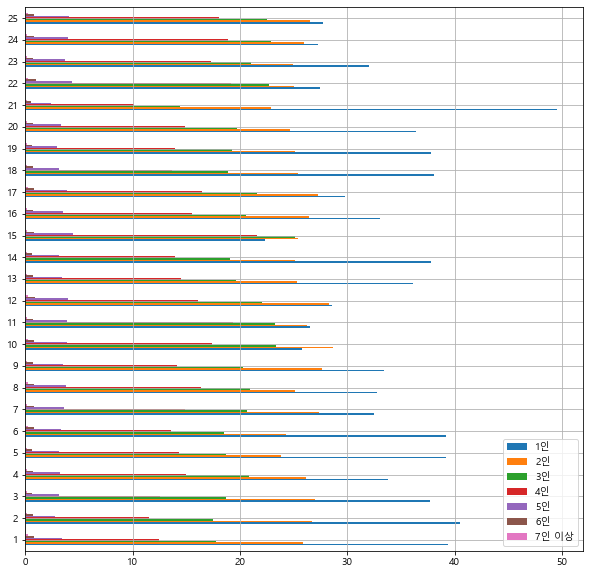

In [289]:
hh19_rate.plot(kind='barh',grid=True)
plt.show()

구별 가구원 비율 비교

In [290]:
hh19_rate.set_index('구별',inplace=True)

In [291]:
hh19_rate

,1인,2인,3인,4인,5인,6인,7인 이상
구별,,,,,,,
종로구,39.377833,25.869884,17.803103,12.494414,3.420481,0.806040,0.228245
중구,40.513065,26.750587,17.505872,11.545802,2.813050,0.684454,0.187170
용산구,37.721755,27.006665,18.715992,12.595383,3.119869,0.656814,0.183522
성동구,33.793272,26.166816,20.879694,14.970270,3.269528,0.714344,0.206076
광진구,39.167473,23.800407,18.714519,14.311731,3.142657,0.671092,0.192122
동대문구,39.199455,24.307545,18.494226,13.594969,3.362342,0.811600,0.229863
중랑구,32.465045,27.402722,20.624969,14.929467,3.586356,0.778101,0.213340
성북구,32.723548,25.147542,20.954682,16.330653,3.801300,0.818202,0.224072
강북구,33.427335,27.684123,20.284817,14.142424,3.487954,0.766334,0.207012


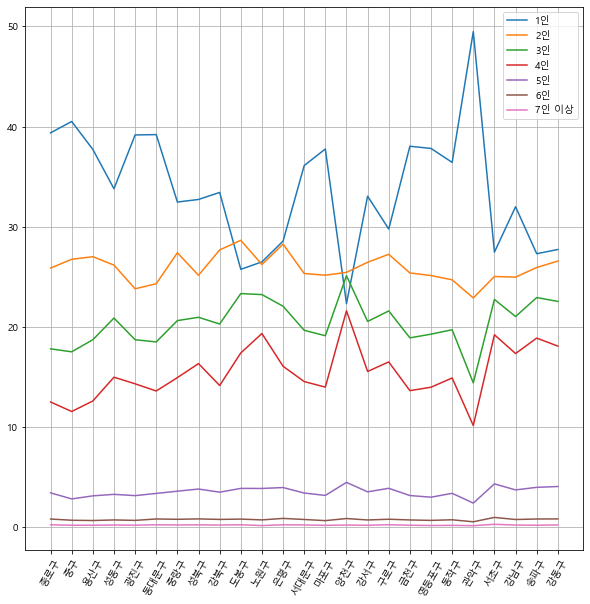

In [292]:
for c in hh19_rate.iloc[:,0:]:
    plt.plot(hh19_rate[c], label=hh19_rate[[c]].columns[0])

plt.xticks(hh19_rate.index, rotation=60)
plt.legend()
plt.grid()
plt.show()

## 상관계수
무엇과 무엇을 비교해야할까

In [293]:
# 1인가구부터 7인이상까지와 인구수의 상관관계
for c in hh19_rate.iloc[:,1:-1]:
    print(hh19_rate[[c]].columns[0], np.corrcoef(hh19_rate[c], pop_18['인구수']))

2인 [[ 1.         -0.14760695]
 [-0.14760695  1.        ]]
3인 [[1.         0.43280495]
 [0.43280495 1.        ]]
4인 [[1.         0.56344719]
 [0.56344719 1.        ]]
5인 [[1.         0.41977772]
 [0.41977772 1.        ]]
6인 [[1.         0.13313444]
 [0.13313444 1.        ]]


In [294]:
# 1인가구부터 7인이상까지와 외국인비율의 상관관계
for c in hh19_rate.iloc[:,1:-1]:
    print(hh19_rate[[c]].columns[0], np.corrcoef(hh19_rate[c], pop_18['외국인비율']))

2인 [[ 1.        -0.1542491]
 [-0.1542491  1.       ]]
3인 [[ 1.        -0.5966906]
 [-0.5966906  1.       ]]
4인 [[ 1.         -0.62519975]
 [-0.62519975  1.        ]]
5인 [[ 1.         -0.58701753]
 [-0.58701753  1.        ]]
6인 [[ 1.         -0.39435968]
 [-0.39435968  1.        ]]


In [295]:
# 1인가구부터 7인이상까지와 고령자비율 상관관계
for c in hh19_rate.iloc[:,1:-1]:
    print(hh19_rate[[c]].columns[0], np.corrcoef(hh19_rate[c], pop_18['고령자비율']))

2인 [[1.         0.56902311]
 [0.56902311 1.        ]]
3인 [[ 1.         -0.16914359]
 [-0.16914359  1.        ]]
4인 [[ 1.         -0.36891352]
 [-0.36891352  1.        ]]
5인 [[ 1.         -0.14623698]
 [-0.14623698  1.        ]]
6인 [[1.         0.06841803]
 [0.06841803 1.        ]]


## 가구원수와 인구수를 동시에 비교

In [296]:
# hh19_rate.set_index('구별',inplace=True) 위에서 함
pop_18.set_index('구별',inplace=True)

In [297]:
result = pd.merge(hh19_rate, pop_18, on = '구별')
result.head()

,1인,2인,3인,4인,5인,6인,7인 이상,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,,,,,
종로구,39.377833,25.869884,17.803103,12.494414,3.420481,0.806040,0.228245,159842,149952,9890,28396,6.187360,17.765043
중구,40.513065,26.750587,17.505872,11.545802,2.813050,0.684454,0.187170,135321,125800,9521,24265,7.035863,17.931437
용산구,37.721755,27.006665,18.715992,12.595383,3.119869,0.656814,0.183522,244953,229786,15167,39995,6.191800,16.327622
성동구,33.793272,26.166816,20.879694,14.970270,3.269528,0.714344,0.206076,302695,295591,7104,45372,2.346917,14.989346
광진구,39.167473,23.800407,18.714519,14.311731,3.142657,0.671092,0.192122,361923,348064,13859,50047,3.829268,13.828079


## 상관계수 데이터프레임에서 더 쉽게 한번에 구하기

In [298]:
result.corr()

,1인,2인,3인,4인,5인,6인,7인 이상,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1인,1.000000,-0.535820,-0.993366,-0.937947,-0.940100,-0.731474,-0.450157,-0.414238,-0.437154,0.476215,-0.434150,0.590722,0.108239
2인,-0.535820,1.000000,0.468670,0.215763,0.376724,0.342659,0.328275,-0.147607,-0.128813,-0.293819,0.031909,-0.154249,0.569023
3인,-0.993366,0.468670,1.000000,0.955209,0.926886,0.706086,0.411557,0.432805,0.454398,-0.457172,0.437612,-0.596691,-0.169144
4인,-0.937947,0.215763,0.955209,1.000000,0.923866,0.675229,0.347965,0.563447,0.582195,-0.434184,0.509709,-0.625200,-0.368914
5인,-0.940100,0.376724,0.926886,0.923866,1.000000,0.870064,0.614718,0.419778,0.442314,-0.470793,0.425628,-0.587018,-0.146237
6인,-0.731474,0.342659,0.706086,0.675229,0.870064,1.000000,0.849212,0.133134,0.155321,-0.407883,0.170830,-0.394360,0.068418
7인 이상,-0.450157,0.328275,0.411557,0.347965,0.614718,0.849212,1.000000,-0.159409,-0.143579,-0.240523,-0.112470,-0.178101,0.182733
인구수,-0.414238,-0.147607,0.432805,0.563447,0.419778,0.133134,-0.159409,1.000000,0.998356,-0.170255,0.946895,-0.617271,-0.544650
한국인,-0.437154,-0.128813,0.454398,0.582195,0.442314,0.155321,-0.143579,0.998356,1.000000,-0.226452,0.948076,-0.657762,-0.532195
외국인,0.476215,-0.293819,-0.457172,-0.434184,-0.470793,-0.407883,-0.240523,-0.170255,-0.226452,1.000000,-0.208276,0.818709,-0.106025


외국인비율은 1인가구를 제외하고 모두 음의 상관계수, 혼자사는 외국인 많음 <br>
고령자비율은 예상과 다르게 1인가구보다 2인가구와 더 높은 상관계수

In [335]:
fp1 = np.polyfit(result['1인'] , result['고령자비율'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(20,50,100)

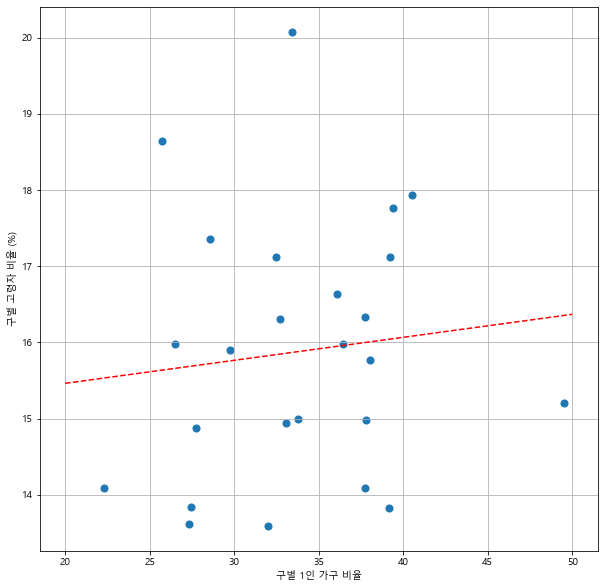

In [336]:
""" 1인과의 고령자비율 비교는 Regression을 그리기 애매함, 상관계수가 낮아서 그럼 """
plt.scatter(result['1인'], result['고령자비율'], s = 50)

plt.plot(fx, f1(fx), color = 'r', ls = 'dashed', label = 'polyfit' )

plt.xlabel('구별 1인 가구 비율')
plt.ylabel('구별 고령자 비율 (%)')

plt.grid()
plt.show()

## Regression에서 현저히 먼 이상치들은 이름이 적혀지고, 멀어질 수록 색깔에 변화를 주기

## 2인 가구와 고령자 비율

In [464]:
fp1 = np.polyfit(result['2인'] , result['고령자비율'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(22,32,100)

In [477]:
er = pd.DataFrame()
er['2인'] = result['2인']
er['고령자비율'] = result['고령자비율']
er['2인_고령자_오차'] = np.abs(er['고령자비율'] - f1(er['2인']))
er_sort_sen = er.sort_values(by='2인_고령자_오차',ascending = False)

In [478]:
er.head()

,2인,고령자비율,2인_고령자_오차
구별,,,
종로구,25.869884,17.765043,1.906811
중구,26.750587,17.931437,1.454605
용산구,27.006665,16.327622,0.329077
성동구,26.166816,14.989346,1.077449
광진구,23.800407,13.828079,0.576564


In [479]:
er_sort_sen.head()

,2인,고령자비율,2인_고령자_오차
구별,,,
강북구,27.684123,20.076862,2.944319
동대문구,24.307545,17.120601,2.359747
송파구,25.931359,13.617951,2.283460
종로구,25.869884,17.765043,1.906811
강남구,24.965621,13.590156,1.632927


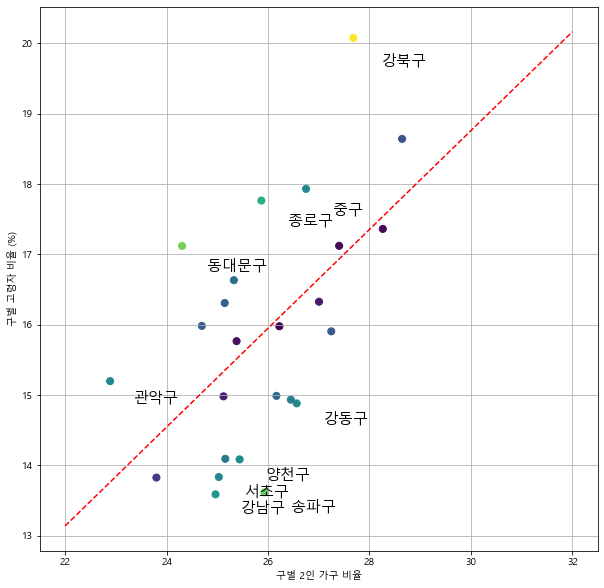

In [483]:
plt.scatter( er['2인'], er['고령자비율'],
        c = er['2인_고령자_오차'], s = 50)

plt.plot(fx, f1(fx), color = 'r', ls = 'dashed', label = 'polyfit' )

for i in range(10):
    plt.text(er_sort_sen['2인'][i]*1.02 , er_sort_sen['고령자비율'][i]*0.98,
             # x 값으로부터 1.02, y값으로부터 0.98만큼 떨어진 곳에 text를 표시
             er_sort_sen.index[i] , fontsize = 15)
             # 뽑아낼 문자열

plt.xlabel('구별 2인 가구 비율')
plt.ylabel('구별 고령자 비율 (%)')

plt.grid()
plt.show()

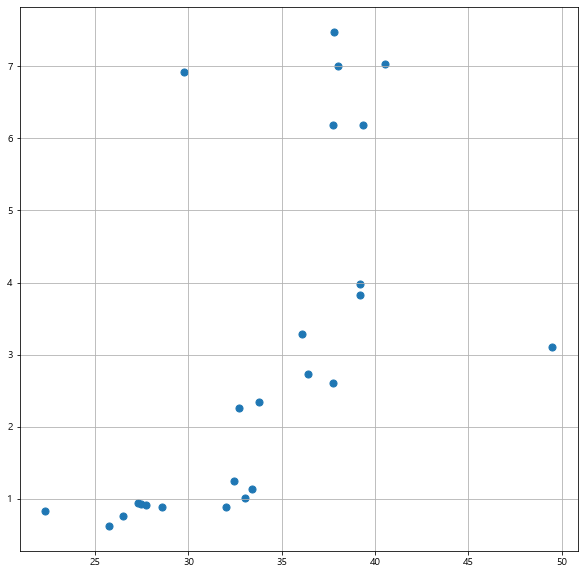

In [481]:
""" 1인과의 고령자비율 비교는 Regression을 그리기 애매함, 상관계수가 낮아서 그럼 """
plt.scatter(result['1인'], result['외국인비율'], s = 50)
# plt.xticks(result.index, rotation=60)
plt.grid()
plt.show()

## 1인가구와 외국인 비율 

In [492]:
fp1 = np.polyfit(result['1인'] , result['외국인비율'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(20,50,100)

In [493]:
er['1인'] = result['1인']
er['외국인비율'] = result['외국인비율']
er['1인_외국인_오차'] = np.abs(er['외국인비율'] - f1(er['1인']))
er_sort_for = er.sort_values(by='1인_외국인_오차',ascending = False)

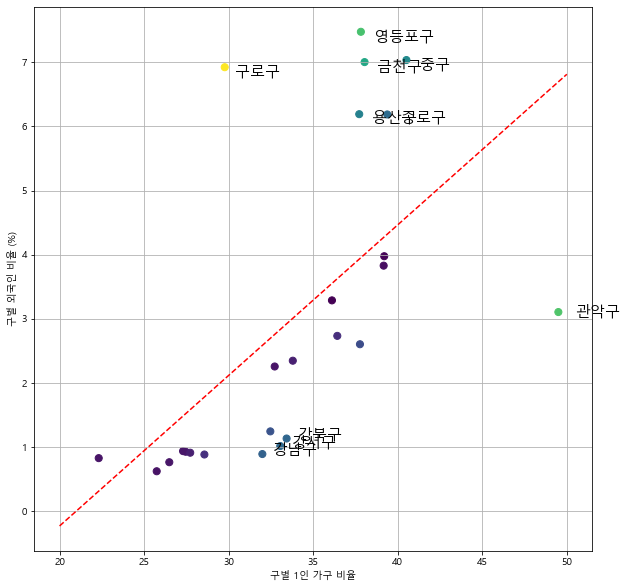

In [494]:
plt.scatter( er['1인'], er['외국인비율'],
        c = er['1인_외국인_오차'], s = 50)

plt.plot(fx, f1(fx), color = 'r', ls = 'dashed', label = 'polyfit' )

for i in range(10):
    plt.text(er_sort_for['1인'][i]*1.02 , er_sort_for['외국인비율'][i]*0.98,
             # x 값으로부터 1.02, y값으로부터 0.98만큼 떨어진 곳에 text를 표시
             er_sort_for.index[i] , fontsize = 15)
             # 뽑아낼 문자열

plt.xlabel('구별 1인 가구 비율')
plt.ylabel('구별 외국인 비율 (%)')

plt.grid()
plt.show()